In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(legacy='1.25')

Fetching data

In [287]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

Question 1
There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [288]:
df= pd.read_csv('car_fuel_efficiency.csv')
df.head().isnull().sum()

engine_displacement    0
num_cylinders          1
horsepower             1
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

What's the median (50% percentile) for variable 'horsepower'?

49
99
149
199

In [289]:
df['horsepower'].mean()

149.65729212983547

In [290]:
#df = df.fillna(0)

In [291]:
#df['horsepower'].mean()

Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures
<br>
Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [292]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [293]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [294]:
n= len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test
print(n, n_val,  n_test, n_train)

9704 1940 1940 5824


In [295]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270])

In [296]:
df_train= df.iloc[idx[:n_train]]
df_val= df.iloc[n_train:n_train+n_val]
df_test= df.iloc[n_train+n_val: n_train+n_val+n_test]
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209
...,...,...,...,...,...,...,...,...,...,...,...
1696,260,5.0,139.0,2606.972984,15.9,2009,USA,Gasoline,All-wheel drive,-1.0,16.964054
5685,280,4.0,132.0,4004.214323,12.8,2014,Europe,Diesel,Front-wheel drive,2.0,10.059094
6735,210,3.0,152.0,2500.175687,16.4,2020,Europe,Gasoline,Front-wheel drive,0.0,17.593237
2052,250,6.0,154.0,2254.313245,13.3,2002,Asia,Gasoline,Front-wheel drive,2.0,18.925748


In [297]:
df_train = df_train.reset_index(drop= True)
df_val = df_val.reset_index(drop= True)
df_test= df_test.reset_index(drop= True)
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
1,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
2,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
3,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
4,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209
...,...,...,...,...,...,...,...,...,...,...,...
5819,260,5.0,139.0,2606.972984,15.9,2009,USA,Gasoline,All-wheel drive,-1.0,16.964054
5820,280,4.0,132.0,4004.214323,12.8,2014,Europe,Diesel,Front-wheel drive,2.0,10.059094
5821,210,3.0,152.0,2500.175687,16.4,2020,Europe,Gasoline,Front-wheel drive,0.0,17.593237
5822,250,6.0,154.0,2254.313245,13.3,2002,Asia,Gasoline,Front-wheel drive,2.0,18.925748


In [298]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  5824 non-null   int64  
 1   num_cylinders        5517 non-null   float64
 2   horsepower           5395 non-null   float64
 3   vehicle_weight       5824 non-null   float64
 4   acceleration         5273 non-null   float64
 5   model_year           5824 non-null   int64  
 6   origin               5824 non-null   object 
 7   fuel_type            5824 non-null   object 
 8   drivetrain           5824 non-null   object 
 9   num_doors            5535 non-null   float64
 10  fuel_efficiency_mpg  5824 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 500.6+ KB


In [299]:
base = ['engine_displacement','horsepower','vehicle_weight','acceleration']

In [300]:
X_train = df_train[base].values

In [301]:
X_train = df_train[base].fillna(0).values
X_val = df_val[base].fillna(0).values
X_test = df_test[base].fillna(0).values

In [302]:
y_train=np.log1p(df_train['fuel_efficiency_mpg'])
y_val=np.log1p(df_val['fuel_efficiency_mpg'])
y_test=np.log1p(df_test['fuel_efficiency_mpg'])
y_train

0       2.870336
1       2.850613
2       2.975112
3       2.550916
4       3.015643
          ...   
5819    2.888373
5820    2.403253
5821    2.922798
5822    2.992013
5823    2.942610
Name: fuel_efficiency_mpg, Length: 5824, dtype: float64

In [303]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
1,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
2,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
3,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
4,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209
...,...,...,...,...,...,...,...,...,...,...,...
5819,260,5.0,139.0,2606.972984,15.9,2009,USA,Gasoline,All-wheel drive,-1.0,16.964054
5820,280,4.0,132.0,4004.214323,12.8,2014,Europe,Diesel,Front-wheel drive,2.0,10.059094
5821,210,3.0,152.0,2500.175687,16.4,2020,Europe,Gasoline,Front-wheel drive,0.0,17.593237
5822,250,6.0,154.0,2254.313245,13.3,2002,Asia,Gasoline,Front-wheel drive,2.0,18.925748


In [304]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [305]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0
1,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0
2,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0
3,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0
4,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN
...,...,...,...,...,...,...,...,...,...,...
5819,260,5.0,139.0,2606.972984,15.9,2009,USA,Gasoline,All-wheel drive,-1.0
5820,280,4.0,132.0,4004.214323,12.8,2014,Europe,Diesel,Front-wheel drive,2.0
5821,210,3.0,152.0,2500.175687,16.4,2020,Europe,Gasoline,Front-wheel drive,0.0
5822,250,6.0,154.0,2254.313245,13.3,2002,Asia,Gasoline,Front-wheel drive,2.0


In [306]:
def train_linear_regression(X,y):
    ones= np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX= X.T.dot(X)
    xtx_inv= np.linalg.inv(XTX)
    w_full = xtx_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [307]:
w0, w = train_linear_regression(X_train,y_train)

In [308]:
y_pred = w0 + X_train.dot(w)
y_pred

array([2.90222666, 2.84155821, 2.95218587, ..., 2.91881698, 3.00313538,
       2.94224272])

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

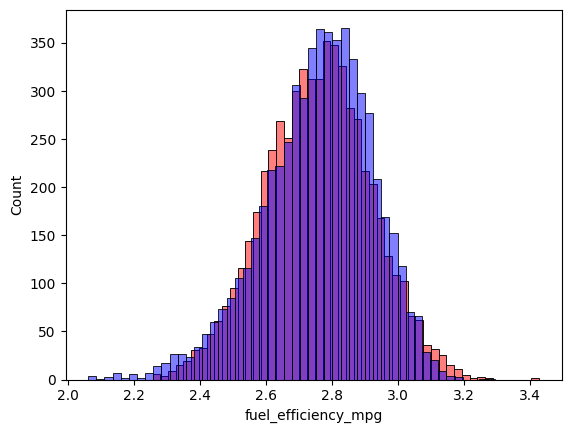

In [309]:
sns.histplot(y_pred, color = 'red', alpha=0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha=0.5, bins =50)

# RMSE

In [310]:
def rmse(y,y_pred):
    se= (y - y_pred)**2
    mse= se.mean()
    return np.sqrt(mse)

In [311]:
score= rmse(y_train, y_pred)
score

0.03842371896788083

## Validating the model

In [312]:
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.038374693248753006

Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If multiple options give the same best RMSE, select the smallest r.

In [320]:
def train_linear_regression_reg(X,y, r=0.01 ):
    
    ones= np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX= X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    xtx_inv= np.linalg.inv(XTX)
    w_full = xtx_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [321]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

0.038372247379231464

In [327]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train,y_train, r=r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val,y_pred).round(5)
    print(r, w0, score) 

0 3.7166862658718713 0.03837
0.01 3.7162225904959 0.03837
0.1 3.7120547127268155 0.03836
1 3.6708844507597345 0.03862
5 3.4984361125056362 0.04567
10 3.3043977715320256 0.06118
100 1.653618633069102 0.24523


In [ ]:
0